# Wave Equation

## Maxwell

## Section 001

## 11/3/2022

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation as ani
from scipy.linalg import toeplitz
import scipy.optimize

# Problem 1
Numerically approximate the solution to the following BVP

$$
u_{tt} = u_{xx} \\
u(0,t) = u(1,t) = 0, \\
u(x,0) = \sin(2\pi x), \\
u_t(x,0) = 0. 
$$

Numerically approximate the solution $u(x,t)$ for $t\in[0,5]$. Use $J=50$ subintervals in the $x$ dimension and $M=50$ subintervals in the $t$ dimension. Animate the results. Compare you results with the analytic solution $u(x,t) = \sin(2\pi x)\cos(2\pi t).$ This function is know as a standing wave.

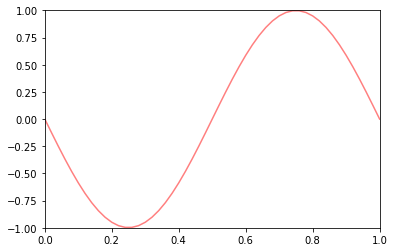

In [3]:
plt.ioff()
#define the parameters of the problem
M = 50
J = 50
x = np.linspace(0,1,J+1)
t = np.linspace(0,5,M+1)
deltax = 1/J
deltat = .5/M

#define f from the pde
f = lambda x: np.sin(2*np.pi*x)

lam = 1 * deltat / deltax

#define g from the pde
g = lambda x: np.zeros_like(x)

#construct our A matrix
diag_one = np.diag(np.ones(J)*lam**2,k=1)
diag_two = np.diag(np.ones(J)*lam**2,k=-1)
diag_three = np.diag(np.ones(J+1)*2*(1-lam**2))

A = diag_one + diag_two + diag_three

#Construct our U matrix using the system given in the lab file
U = np.zeros((J+1, M+1))

U[0][1:-1] = f(x[1:-1])
U[1][1:J] = [U[0][j] + g(x[j])*deltat + .5*lam**2 * (U[0][j-1] - 2*U[0][j] + U[0][j+1]) for j in range(1, J)]

for i in range(2, M+1):
    U[i]= A@U[i-1] - U[i-2]
    U[i,0], U[i,-1] = 0, 0

#animate the rows (time solutions) of U
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-1,1))
traj, = plt.plot([], [], color = 'r', alpha=.5)
trajsol, = plt.plot([], [], color = 'b', alpha=.5)

an_sol = lambda x, t: np.sin(2*np.pi*x)*np.cos(np.pi*2*t)
def update(i):
    traj.set_data(x,U[i])    #create our update function
    #trajsol.set_data(x, an_sol(x[i], t[i]))
    return traj
    
wave_anime = ani.FuncAnimation(fig, update, frames=range(M), interval=100)
wave_anime.save("problem1.mp4")

 <video src='problem1.mp4' controls>

# Problem 2

Consider the boundary value problem 

$$
u_{tt} = u_{xx}, \\
u(0,t) = u(1,t) = 0, \\
u(x,0) = 0.2e^{-,^2(x-1/2)^2} \\
y_t(x,0) = 0.4m^2(x-\frac{1}{2})e^{-m^2(x-1/2)^2}.
$$

The solution of this problem is ta Gaussian pulse. It travels to the right at a constant speed. This solution models, for example, a wave pulse in a stretched string. Note that the fixed boundart conditions reflect the pulse back when it meets the boundary.

Numerically approximate the solution $u(x,t)$ for $t\in[0,1]$. Set $m=20$. Use 200 subintervals in space and 220 in time, and animate your results. Then use 200 subintervals in space and 180 in time, and animate your results. Note that the stability condition is not satisfied for the second mesh.

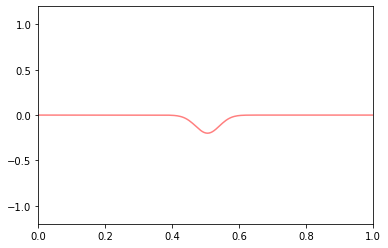

In [111]:
plt.ioff()
#define our parameters for the problem
m = 20
M = 220
J = 200
x = np.linspace(0,1,J+1)
t = np.linspace(0,1,M+1)
deltax = 1/J
deltat = 1/M

#define f from the pde
f = lambda x: .2*np.exp(-m**2*(x-1/2)**2)
lam = 1 * deltat / deltax

#define g from the pde
g = lambda x: .4*m**2*(x-1/2)*np.exp(-m**2*(x-1/2)**2)

#construct our A matrix
diag_one = np.diag(np.ones(J)*lam**2,k=1)
diag_two = np.diag(np.ones(J)*lam**2,k=-1)
diag_three = np.diag(np.ones(J+1)*2*(1-lam**2))

A = diag_one + diag_two + diag_three

#Construct our U matrix
U = np.zeros((M+1, J+1))

U[0][1:-1] = f(x[1:-1])
U[1][1:J] = [U[0][j] + g(x[j])*deltat + .5*lam**2 * (U[0][j-1] - 2*U[0][j] + U[0][j+1]) for j in range(1, J)]

for i in range(2, M+1):
    U[i]= A@U[i-1] - U[i-2]
    U[i,0], U[i,-1] = 0, 0

#animate each row (time solution) of U
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-1.2,1.2))
traj, = plt.plot([], [], color = 'r', alpha=.5)

def update(i):
    traj.set_data(x,U[i])    #create our update function
    return traj
    
wave_anime = ani.FuncAnimation(fig, update, frames=range(M), interval=100)
wave_anime.save("problem21.mp4")

 <video src='problem21.mp4' controls>

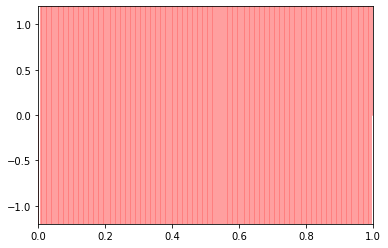

In [112]:
plt.ioff()
#define our parameters for the problem
m = 20
M = 180
J = 200
x = np.linspace(0,1,J+1)
t = np.linspace(0,1,M+1)
deltax = 1/J
deltat = 1/M

#define f from the pde
f = lambda x: .2*np.exp(-m**2*(x-1/2)**2)
lam = 1 * deltat / deltax

#define g from the pde
g = lambda x: .4*m**2*(x-1/2)*np.exp(-m**2*(x-1/2)**2)

#construct our A matrix
diag_one = np.diag(np.ones(J)*lam**2,k=1)
diag_two = np.diag(np.ones(J)*lam**2,k=-1)
diag_three = np.diag(np.ones(J+1)*2*(1-lam**2))

A = diag_one + diag_two + diag_three

#use the system from the lab file to construct U
U = np.zeros((M+1, J+1))

U[0][1:-1] = f(x[1:-1])
U[1][1:J] = [U[0][j] + g(x[j])*deltat + .5*lam**2 * (U[0][j-1] - 2*U[0][j] + U[0][j+1]) for j in range(1, J)]

for i in range(2, M+1):
    U[i]= A@U[i-1] - U[i-2]
    U[i,0], U[i,-1] = 0, 0

#animate each row of U
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-1.2,1.2))
traj, = plt.plot([], [], color = 'r', alpha=.5)

def update(i):
    traj.set_data(x,U[i])    #create our update function
    return traj
    
wave_anime = ani.FuncAnimation(fig, update, frames=range(M), interval=100)
wave_anime.save("problem22.mp4")

 <video src='problem22.mp4' controls>

# Problem 3

Consider the initial boundary value problem
$$
	u_{tt} = u_{xx}, \\
	u(0,t) = u(1,t) = 0, \\
	u(x,0) = 0.2e^{-m^2(x-1/2)^2}\\
	u_t(x,0) = 0.
$$
The initial condition separates into two smaller, slower-moving pulses, one travelling to the right and the other to the left.
This solution models, for example, a plucked guitar string

Numerically approximate the solution $u(x,t)$ for $t \in \left[0,2\right]$.
Set $m=20$.
Use 200 subintervals in space and 440 in time, and animate your results.
It is rather easy to see that the solution to this problem is the sum of two travelling waves, one travelling to the left and the other to the right, as described earlier.

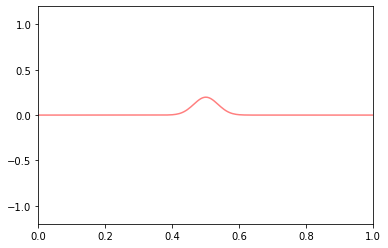

In [113]:
plt.ioff()
#define our parameters for the problem
m = 20
M = 440
J = 200
x = np.linspace(0,1,J+1)
t = np.linspace(0,2,M+1)
deltax = 1/J
deltat = 2/M

#define f from the pde
f = lambda x: .2*np.exp(-m**2*(x-1/2)**2)
lam = 1 * deltat / deltax

#define g from the pde
g = lambda x: np.zeros_like(x)

#construct our A matrix
diag_one = np.diag(np.ones(J)*lam**2,k=1)
diag_two = np.diag(np.ones(J)*lam**2,k=-1)
diag_three = np.diag(np.ones(J+1)*2*(1-lam**2))

A = diag_one + diag_two + diag_three

#construct our U matrix using the system in the file
U = np.zeros((M+1, J+1))

U[0][1:-1] = f(x[1:-1])
U[1][1:J] = [U[0][j] + g(x[j])*deltat + .5*lam**2 * (U[0][j-1] - 2*U[0][j] + U[0][j+1]) for j in range(1, J)]

#animate each row of U
for i in range(2, M+1):
    U[i]= A@U[i-1] - U[i-2]
    U[i,0], U[i,-1] = 0, 0

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-1.2,1.2))
traj, = plt.plot([], [], color = 'r', alpha=.5)

def update(i):
    traj.set_data(x,U[i])    #create our update function
    return traj
    
wave_anime = ani.FuncAnimation(fig, update, frames=range(M), interval=100)
wave_anime.save("problem3.mp4")

 <video src='problem3.mp4' controls>

# Problem 4

Consider the initial boundary value problem

$$
	u_{tt} = u_{xx}, \\
	u(0,t) = u(1,t) = 0, \\
	u(x,0) = \begin{cases} 1/3 & \text{if } 5/11 < x < 6/11,\\
	0 & \text{otherwise}
	\end{cases}\\
	u_t(x,0) = 0.
$$

Numerically approximate the solution $u(x,t)$ for $t \in \left[0, 2\right]$.
Use 200 subintervals in space and 440 in time, and animate your results.
Even though the method is second order and stable for this discretization, since the initial condition is discontinuous there are large dispersive errors.

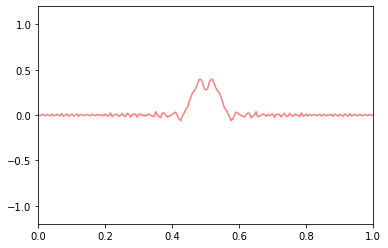

In [114]:
plt.ioff()
#define our parameters for the problem
m = 20
M = 440
J = 200
x = np.linspace(0,1,J+1)
t = np.linspace(0,2,M+1)
deltax = 1/J
deltat = 2/M

#define f from the pde
f = lambda x: np.piecewise(x, [((x > 5/11) & (x < 6/11)), ((x <= 5/11) | (x >= 6/11))], [1/3, 0])
lam = 1 * deltat / deltax

#define g from the pde
g = lambda x: np.zeros_like(x)

#construct our A matrix
diag_one = np.diag(np.ones(J)*lam**2,k=1)
diag_two = np.diag(np.ones(J)*lam**2,k=-1)
diag_three = np.diag(np.ones(J+1)*2*(1-lam**2))

A = diag_one + diag_two + diag_three

#construct U from the system in the file
U = np.zeros((M+1, J+1))

U[0][1:-1] = f(x[1:-1])
U[1][1:J] = [U[0][j] + g(x[j])*deltat + .5*lam**2 * (U[0][j-1] - 2*U[0][j] + U[0][j+1]) for j in range(1, J)]

for i in range(2, M+1):
    U[i]= A@U[i-1] - U[i-2]
    U[i,0], U[i,-1] = 0, 0

#animate each row of U
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-1.2,1.2))
traj, = plt.plot([], [], color = 'r', alpha=.5)

def update(i):
    traj.set_data(x,U[i])    #create our update function
    return traj
    
wave_anime = ani.FuncAnimation(fig, update, frames=range(M), interval=100)
wave_anime.save("problem4.mp4")

 <video src='problem4.mp4' controls>

# Problem 5


Numerically solve the initial value problem

$$
	u_t -su_x + uu_x = u_{xx}, \quad x \in (-\infty,\infty),\\
	u(x,0) = v(x),
$$

for $t \in [0,1]$.
Let the perturbation $v(x)$ be given by

$$
v(x) = 3.5(\sin{(3x)} + 1)\frac{1}{\sqrt{2\pi}} \exp{(-x^2/2)}
$$

And let the initial condition be $u(x, 0) = \hat{u}(x) + v(x)$
Approximate the $x$ domain,$(-\infty, \infty)$, numerically by the finite interval $[-20,20]$, and fix $u(-20) = u_-$, $u(20) = u_+$. Let $u_- = 5$, $u_+ = 1$.
Use 150 intervals in space and 350 steps in time.
Animate your results.
You should see the solution converge to a translate of the travelling wave $\hat{u}$.

Hint: This difference scheme is no longer a linear equation.
We have a nonlinear equation in $U^{n+1}$.
We can still solve this function using Newton's method or some other similar solver.
In this case, use `scipy.optimize.fsolve`.

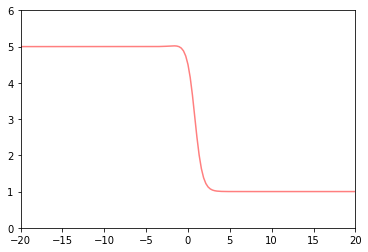

In [116]:
#define the parameters for the problem
M = 350
J = 150
deltax = 40 / J
deltat = 1 / M
x = np.linspace(-20, 20, J+1)
k1 = deltat / (4 * deltax)
k2 = deltat /(2 * deltax**2)
um = 5
up = 1
s = (um + up) / 2
a = (um - up) / 2

#start to construct our U matrix
U = np.zeros((M+1, J+1))
U[0,0] = um
U[0,-1] = up

#define v and uhat from the pde
v = lambda x: 7/2 * (np.sin(3*x) + 1) * (1/np.sqrt(2*np.pi)) * np.exp(-.5*x**2)
uhat = lambda x: s - a*np.tanh(a*x/2)

#create the first row of U
U[0][1:J+1] = [uhat(xj) + v(xj) for xj in x[1:J+1]]

#f0 is our initial guess in fsolve
f0 = U[0]

#define a function using the Crank-Nicolson method that will allow us to find the proper roots using fsolve
def crank_nic(u1,u0,k1,k2,s):
    ncols = u1.shape[-1]
    root_eq = [u1[i] - u0[i] - k1*((s-u1[i])*(u1[i+1]-u1[i-1]) + (s-u0[i])*(u0[i+1]-u0[i-1])) - k2*((u1[i+1]-2*u1[i] + u1[i-1]) + (u0[i+1]-2*u0[i]+u0[i-1])) for i in range(1, ncols-1)]
    root_eq = [u1[0] - u0[0]] + root_eq + [u1[-1] - u0[-1]]
    return root_eq

#find the roots of each modified Crank-Nicolson equation to find the rows of U
for i in range(1, M+1):
    U[i] = scipy.optimize.fsolve(crank_nic, f0, args=(U[i-1], k1, k2, s))
    
# plt.plot(x, U[-1])
# plt.show()

#animate each row of U
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((-20,20))
ax.set_ylim((0,6))
traj, = plt.plot([],[],color='r', alpha=0.5)
def update(i):
    traj.set_data(x,U[i])    #create our update function
    return traj
    
cn_ani = ani.FuncAnimation(fig, update, frames=range(M), interval=100)
cn_ani.save("problem5.mp4")

<video src='problem5.mp4' controls>